In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import os
import dask.bag as bag
from dask.diagnostics import ProgressBar
import pandas as pd

def get_dims(file):
    im = Image.open(file)
    arr = np.array(im)
    try:
        h, w, d = arr.shape
    except:
        print(file, arr.shape)
        h, w = arr.shape
    return h, w


def plot_image_dimensions(dbm_dir, lbm_dir):
    directories = {'dbm': dbm_dir,
                   'lbm': lbm_dir}
    for n, d in directories.items():
        filepath = d
        filelist = [filepath + f for f in os.listdir(filepath)]
        dims = bag.from_sequence(filelist).map(get_dims)
        with ProgressBar():
            dims = dims.compute()
            dim_df = pd.DataFrame(dims, columns=['height', 'width'])
            sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0: 'count'})
            sizes.plot.scatter(x='width', y='height')
            plt.title('Image Sizes (pixels) | {}'.format(n))
            plt.show()


def show_image_sample(dbm_dir, lbm_dir):
    nrows = 4
    ncols = 4
    pic_index = 0
    pic_index += 16

    directories = {'dbm': dbm_dir,
                   'lbm': lbm_dir}
    for n, d in directories.items():
        filepath = d
        filelist = [filepath + f for f in os.listdir(filepath)]
        next_blight_pix = [os.path.join(fname)
                           for fname in filelist[pic_index - 16:pic_index]]
        print('next_blight_pix=', next_blight_pix)

        fig = plt.gcf()
        fig.set_size_inches(ncols * 4, nrows * 4)
        for i, img_path in enumerate(next_blight_pix):
            sp = plt.subplot(nrows, ncols, i + 1)
            sp.axis('Off')
            img = imread(img_path)
            plt.imshow(img)
        plt.show()

## Plot Image Size

[########################################] | 100% Completed |  1.1s


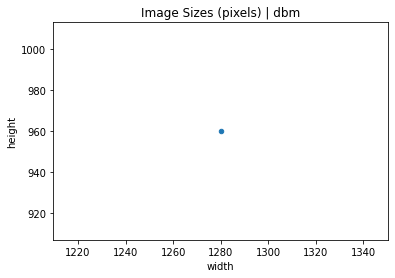

[########################################] | 100% Completed |  0.9s


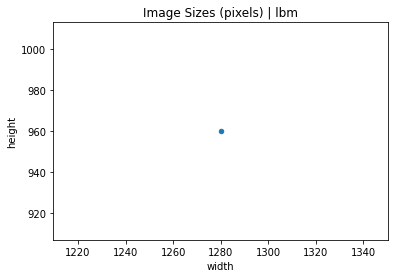

In [27]:
plot_image_dimensions('../data/raw/dbm/','../data/raw/lbm/')


## View Images

next_blight_pix= ['../data/raw/dbm/DBM_90_13Jan_DN.jpg', '../data/raw/dbm/DBM_55_13Jan_PC.jpg', '../data/raw/dbm/DBM_80B_13Jan_DN.jpg', '../data/raw/dbm/DBM_58_13Jan_PC.jpg']


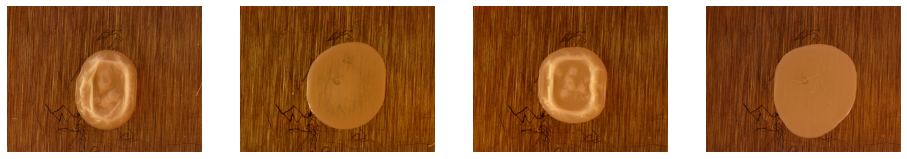

next_blight_pix= ['../data/raw/lbm/LBM_70_5Jan_PC.jpg', '../data/raw/lbm/LBM_90A_5Jan_DN.jpg', '../data/raw/lbm/LBM_80_5Jan_DN.jpg', '../data/raw/lbm/LBM_70B_5Jan_PC.jpg']


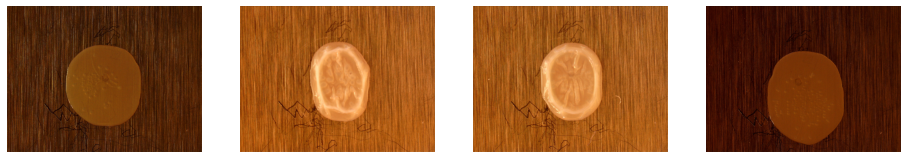

In [28]:
show_image_sample('../data/raw/dbm/','../data/raw/lbm/')